In [1]:
library(RJDBC)
jdbcDriver <- JDBC(driverClass="com.snowflake.client.jdbc.SnowflakeDriver", classPath="/Users/eclipse/code/snowflake-jdbc-3.0.9.jar")
jdbcConnection <- dbConnect(jdbcDriver, "jdbc:snowflake://dealbase.snowflakecomputing.com", "ravi","!Chi09tra")

# Basic connection status check.
# result <- dbGetQuery(jdbcConnection, "select current_timestamp() as now")
# print(result)

dw <- "use warehouse dw"
db <- "use database goseek_partner"
sc <- "use schema adwords"
dbSendStatement(jdbcConnection, dw)
dbSendStatement(jdbcConnection, db)
dbSendStatement(jdbcConnection, sc)


Loading required package: DBI
Loading required package: rJava


<JDBCResult>

<JDBCResult>

<JDBCResult>

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


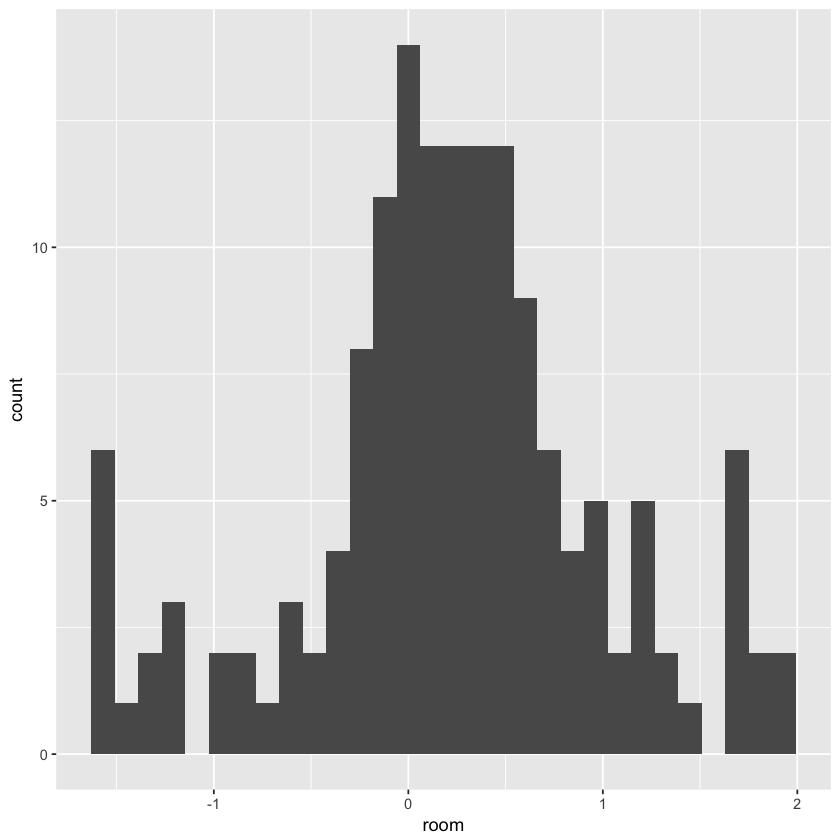

In [2]:
query <-
  "
    select  round(max_cpc - avg_cpc, 2) as room, 
            count(*) as entries
    from    goseek_partner.adwords.rev_cost_goseek
    where   date = '2017-04-20'
    and     match_type = 'Exact'
    and     avg_cpc > 0
    group by 1
  "
result <- dbGetQuery(jdbcConnection, query)
names(result) <- tolower(names(result))

library(ggplot2)
ggplot(data = result, mapping = aes(x = room)) + geom_histogram()